# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np #facilite la manipulaion des tableaux
import matplotlib.pyplot as plt #afficher les grphes
import math #utliser les fonctionnes mathematique
import time #Calculer le temps d'execution 

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',')
print("Taille:",data.shape) #Afficher les dimensions du datasets
print(data[:5]) #afficher un échantillon du dataset pour mieux connaitre les donnees manipulées 

Taille: (100, 3)
[[ 6.9247 15.605   0.    ]
 [ 6.0573  8.779   0.    ]
 [ 7.1695 14.58    0.    ]
 [12.037  17.262   1.    ]
 [15.807  15.069   1.    ]]


Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
print(X[:5])

[[ 1.      6.9247 15.605 ]
 [ 1.      6.0573  8.779 ]
 [ 1.      7.1695 14.58  ]
 [ 1.     12.037  17.262 ]
 [ 1.     15.807  15.069 ]]


In [4]:
print('X', X.shape ,' y ', y.shape)
print(np.unique(y, return_counts=True))

X (100, 3)  y  (100,)
(array([0., 1.]), array([40, 60]))


# Descente du Gradient : Préparation des fonctions

0- Fonction Logistique (Sigmoid)

In [5]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1 + math.exp(-z))

Graphe de la fonction segmoid

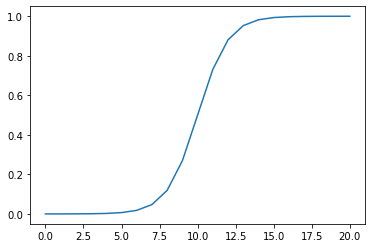

In [6]:
plt.plot([Sigmoid(i) for i in range(-10,11)])

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

- fonction hypothese

In [7]:
def Hypothese(X,theta):
    #En utilisent la fonction Segmoid declare avant 
    return Sigmoid(theta.transpose().dot(X.reshape(X.shape[0])))

- Sans vectorisation

In [8]:
def computeCostNonVect(X, y, theta):
    somme = 0
    
    for i in range(X.shape[0]):
        
        h = Hypothese(X[i],theta)
        
        somme += (y[i]*math.log(h)) + (1 - y[i])*(math.log(1 - h))
        
    return - (somme)/(len(X))


- Avec vectorisation

In [9]:
def computeCost(X, y, theta):
    
    #(y[i]*math.log(h)) + (1 - y[i])*(math.log(1 - h))
    theta = theta.transpose()
    
    tab_h = 1/(1 + np.exp(- (theta.dot(X.transpose())) ))
    
    tab_h = tab_h.reshape(y.shape[0])
    
    return -(((y*np.log(tab_h)) + (1 - y)*(np.log(1 - tab_h))).sum()/(len(X)))



Comparaison du temps d'execution avec et sans vectorisation

In [10]:

debut = time.time()
print("Couts:",computeCostNonVect(X,y,np.zeros((3,1))))
fin = time.time()
print(f"temps d'execution sans vectorisation:{fin-debut}")

debut = time.time()
print("Couts:",computeCost(X,y,np.zeros((3,))))
fin = time.time()
print(f"temps d'execution avec vectorisation:{fin-debut}")

Couts: 0.6931471805599458
temps d'execution sans vectorisation:0.0034639835357666016
Couts: 0.6931471805599453
temps d'execution avec vectorisation:0.002020597457885742


2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [11]:
def gradientDescent(X, y, theta, alpha=0.01, iterations=150):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    i = 0
    temp_theta = np.zeros((theta.shape))
    couts_history, theta_history = [],[]
    theta1 = theta
    
    while (iterations>i):
        
        tab_h = 1/(1 + np.exp(- (theta1.transpose().dot(X.transpose())))) #calculer 
        
        tab_h = tab_h.reshape(len(y))
       
        for j in range(len(theta)):
            
            temp_theta[j] = theta1[j] - alpha*((((tab_h - y)*X[:,j]).sum())/(len(y)))
        
        """
        if(theta1 == temp_theta).all(): #Arret en cas d'arriver au min 
            theta1 = temp_theta
            break
        """
        """
        lors de l'execution on a remarque que avec la condition d'arret le programme fait au plus 2 iteration sans 
        converger vers le min 
        """
        theta1 = temp_theta
        
        
        couts_history.append(computeCost(X,y,temp_theta))
        
        theta_history.append([theta1[0][0],theta1[1][0]])
        
        i+=1
    return theta1, couts_history, theta_history



# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [12]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [13]:
print(X.shape,y.shape,theta.shape)
initialCost=computeCost(X, y, theta)
print("Cout initial: ",initialCost)

(100, 3) (100,) (3, 1)
Cout initial:  0.6931471805599453


Appel des la fonction de calcul du gradient

In [14]:
# paramètres
iterations = 150000;
alpha = 0.02;
# Appel
theta, couts_history, theta_history = gradientDescent(X, y, theta, alpha, iterations);

print("Les parametres obtenus:")
print("Theta0: ",theta[0,0])
print("Theta1: ",theta[1,0])
print("Theta2: ",theta[2,0])

Les parametres obtenus:
Theta0:  -21.053658802704106
Theta1:  0.8670018277616284
Theta2:  0.8410983715600169


Apres plusieurs tests on a pu avoir des dons resultats avec: 
- Un nombre d'iteration = 150000
- Taux d'apprentissage = 0.2

Traçage de la fonction du coût

Text(0, 0.5, 'Couts')

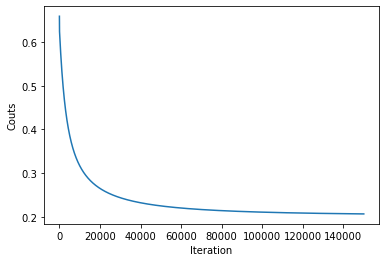

In [15]:
plt.plot(couts_history)
plt.xlabel("Iteration")
plt.ylabel("Couts")

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [16]:
def drawLine(X,theta):

      return -(theta[0]+X*theta[1])/theta[2]
  



# Affichage 
Graphe representant les acceptations selon les caracteristiques

(100, 3)


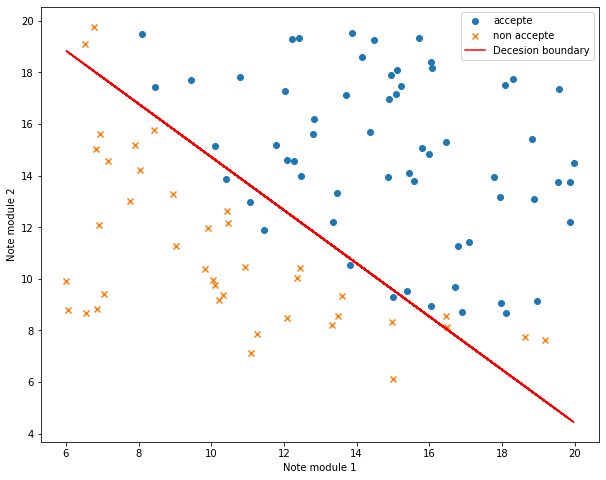

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
ligne=drawLine(X,theta)
print(ligne.shape)
plt.plot(X[:,1],ligne[:,1],label= "Decesion boundary",color = "red")
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()
plt.show()

Traçage du coût en fonction de theta0 et theta1

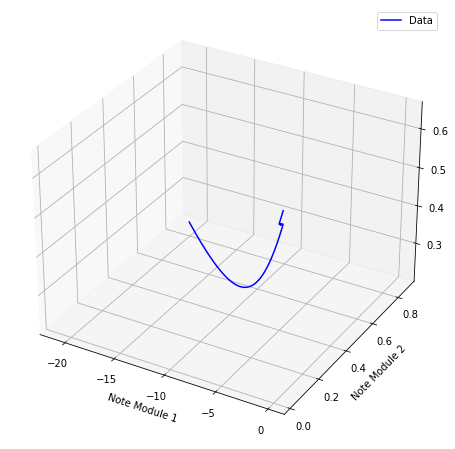

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
plt.figure(figsize=(10,8))
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d' )
ax.plot(np.array(theta_history)[:,0],np.array(theta_history)[:,1],couts_history, color = "blue",label="Data")

plt.xlabel("Note Module 1")
plt.ylabel("Note Module 2")

plt.legend()

Prédire des valeurs de y

In [19]:
# Predire pour des notes note1= 9 et note2=17
X1=np.array([1,9,17])
print("L'etudiant qui a eu comme notes :",X1[1]," et ",X1[2]," est à ",Hypothese(X1,theta)*100,"% admis")
# Predire pour des notes note1= 9 et note2=10
X2=np.array([1,9,10])
print("L'etudiant qui a eu comme notes :",X2[1]," et ",X2[2]," est à ",Hypothese(X2,theta)*100,"% admis")

L'etudiant qui a eu comme notes : 9  et  17  est à  74.03964187293172 % admis
L'etudiant qui a eu comme notes : 9  et  10  est à  0.7847680466568183 % admis


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [20]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(C=1e2).fit(X[:,1:3],y)

theta_sk = [model.intercept_[0],model.coef_[0][0],model.coef_[0][1]]

print("Avec sklearn: ",theta_sk)
print("Nos resultats: ",theta.transpose())

Avec sklearn:  [-25.134407069384256, 1.030084108773647, 1.0062491009236367]
Nos resultats:  [[-21.0536588    0.86700183   0.84109837]]


In [21]:
# Predire pour des notes note1= 9 et note2=17
X1=np.array([9,17])
print("L'etudiant qui a eu comme notes :",X1[0]," et ",X1[1]," est à ",model.predict_proba([X1])[0,1]*100,"% admis")
# Predire pour des notes note1= 9 et note2=10
X2=np.array([9,10])
print("L'etudiant qui a eu comme notes :",X2[0]," et ",X2[1]," est à ",model.predict_proba([X2])[0,1]*100,"% admis")

L'etudiant qui a eu comme notes : 9  et  17  est à  77.60135852610023 % admis
L'etudiant qui a eu comme notes : 9  et  10  est à  0.30149303038223657 % admis


(100, 3)


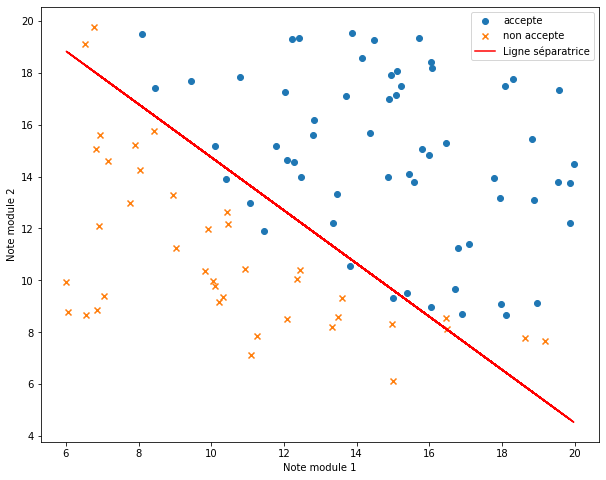

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
ligne=drawLine(X,theta_sk)
print(ligne.shape)
plt.plot(X[:,1],ligne[:,1],label= "Ligne séparatrice",color = "red")
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()
plt.show()

Les resultats que on a obtenus sont preseque les memes avec les resultats obtenus en utilisent Sklearn

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [23]:
# bonne chance